In [58]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import datetime as dt
from datetime import date
plt.style.use('fivethirtyeight')
end=date.today()
start=date.today()-dt.timedelta(1200)


In [59]:
df= web.DataReader('SOFI', data_source='yahoo', start=start, end=end)
df2= web.DataReader('Open', data_source='yahoo', start=start, end=end)
df3= web.DataReader('FUBO', data_source='yahoo', start=start, end=end)
df4= web.DataReader('GME', data_source='yahoo', start=start, end=end)
df5= web.DataReader('AMC', data_source='yahoo', start=start, end=end)
df6= web.DataReader('DIS', data_source='yahoo', start=start, end=end)
df7= web.DataReader('F', data_source='yahoo', start=start, end=end)
df8= web.DataReader('ADA-USD', data_source='yahoo', start=start, end=end)
df9= web.DataReader('DOT-USD', data_source='yahoo', start=start, end=end)
df10= web.DataReader('SOL-USD', data_source='yahoo', start=start, end=end)
df11= web.DataReader('LAC', data_source='yahoo', start=start, end=end)

In [60]:
#Get the number of rows and columns of the DF
df.shape
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,12.590000,11.800000,12.590000,12.200000,1371400,12.200000
2021-01-05,12.280000,12.090000,12.150000,12.150000,1304000,12.150000
2021-01-06,12.200000,11.890000,12.150000,12.120000,1105700,12.120000
2021-01-07,22.000000,12.050000,12.200000,19.139999,64877000,19.139999
2021-01-08,22.000000,17.889999,21.459999,18.740000,35657000,18.740000
...,...,...,...,...,...,...
2021-12-23,15.190000,14.730000,14.981000,15.090000,19742900,15.090000
2021-12-27,15.490000,14.850000,15.110000,15.390000,19826700,15.390000
2021-12-28,15.490000,14.670000,15.280000,14.850000,24049700,14.850000


Text(0, 0.5, 'Price(USD)')

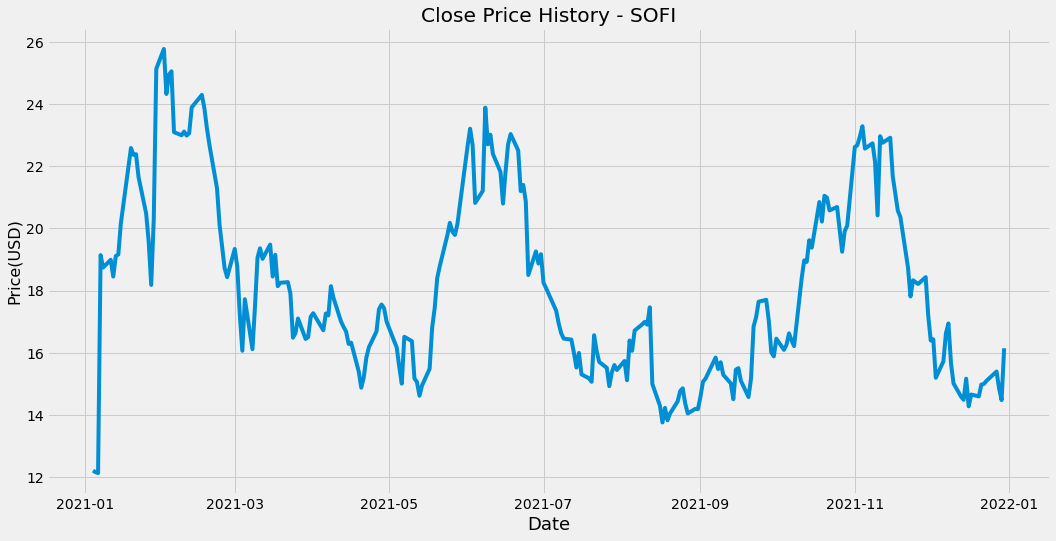

In [61]:
#Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History - SOFI')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price(USD)',fontsize=16)

In [64]:
df = df.reset_index()
df

,level_0,index,Date,High,Low,Open,Close,Volume,Adj Close
0,0,0,2021-01-04,12.590000,11.800000,12.590000,12.200000,1371400,12.200000
1,1,1,2021-01-05,12.280000,12.090000,12.150000,12.150000,1304000,12.150000
2,2,2,2021-01-06,12.200000,11.890000,12.150000,12.120000,1105700,12.120000
3,3,3,2021-01-07,22.000000,12.050000,12.200000,19.139999,64877000,19.139999
4,4,4,2021-01-08,22.000000,17.889999,21.459999,18.740000,35657000,18.740000
...,...,...,...,...,...,...,...,...,...
246,246,246,2021-12-23,15.190000,14.730000,14.981000,15.090000,19742900,15.090000
247,247,247,2021-12-27,15.490000,14.850000,15.110000,15.390000,19826700,15.390000
248,248,248,2021-12-28,15.490000,14.670000,15.280000,14.850000,24049700,14.850000
249,249,249,2021-12-29,14.833000,14.180000,14.831000,14.470000,20790600,14.470000


In [65]:
#Sofi Daily Change
percent_change=0.00000000000000
yest_close=df.at[len(df)-1,'Close']
two_day_close=df.at[len(df['index'])-2,'Close']
percent_change=((yest_close-two_day_close)/two_day_close)
if (yest_close < two_day_close):
    print('Percent loss of '+str(percent_change*100)+'% day over day')
else:
    print('Percent gain of '+str(percent_change*100)+'% day over day')
print('Close Cost of $'+str(yest_close))

Percent gain of 11.541811895488632% day over day
Close Cost of $16.140100479125977


Text(0, 0.5, 'Price(USD)')

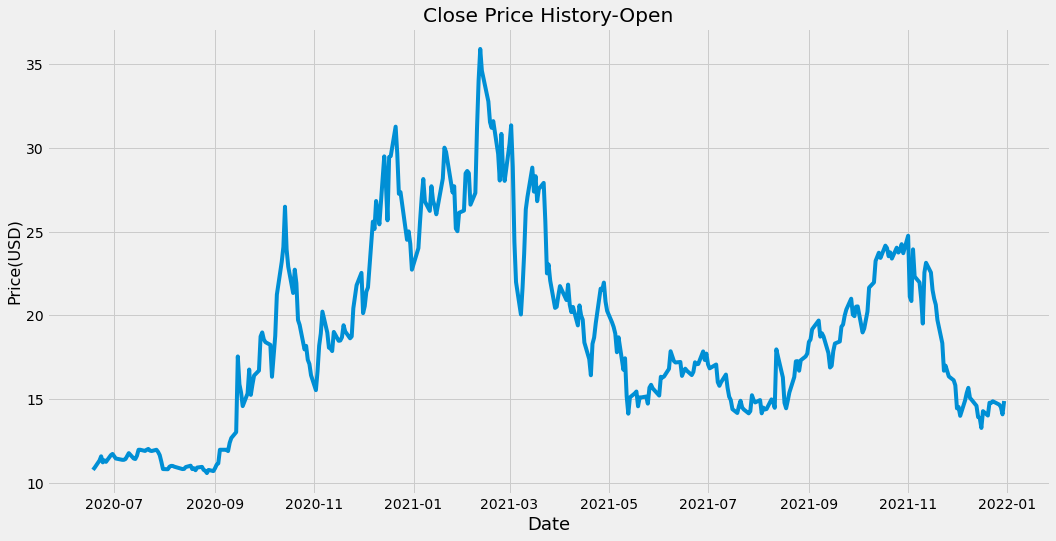

In [66]:
#Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History-Open')
plt.plot(df2['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price(USD)',fontsize=16)

In [67]:
df2=df2.reset_index()

In [91]:
#OPEN Daily Change
percent_change=0.00000000000000
yest_close=df2.at[len(df2)-1,'Close']
two_day_close=df2.at[len(df2)-2,'Close']
percent_change=((yest_close-two_day_close)/two_day_close)
if (yest_close < two_day_close):
    print('Percent loss of '+str(percent_change*100)+'% day over day')
else:
    print('Percent gain of '+str(percent_change*100)+'% day over day')
print('Close Cost of $'+str(yest_close))

Percent gain of 5.634302591337974% day over day
Close Cost of $14.904999732971191


Text(0, 0.5, 'Price(USD)')

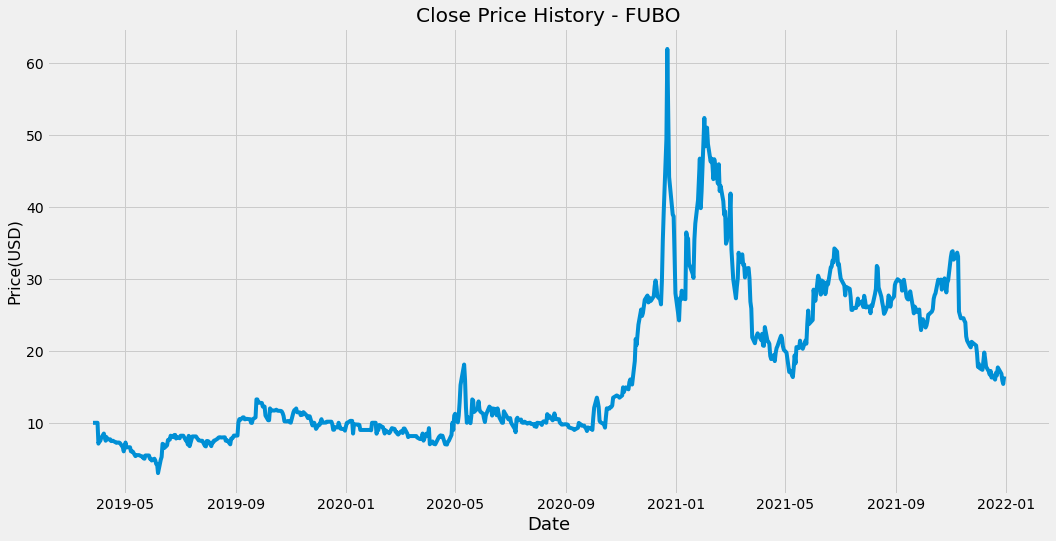

In [69]:
plt.figure(figsize=(16,8))
plt.title('Close Price History - FUBO')
plt.plot(df3['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price(USD)',fontsize=16)

In [70]:
df3=df3.reset_index()

In [90]:
#Fubo Daily Change
percent_change=0.00000000000000
yest_close=df3.at[len(df3)-1,'Close']
two_day_close=df3.at[len(df3)-2,'Close']
percent_change=((yest_close-two_day_close)/two_day_close)
if (yest_close < two_day_close):
    print('Percent loss of '+str(percent_change*100)+'% day over day')
else:
    print('Percent gain of '+str(percent_change*100)+'% day over day')
print('Close Cost of $'+str(yest_close))

Percent gain of 6.785714949216841% day over day
Close Cost of $16.44499969482422


Text(0, 0.5, 'Price(USD)')

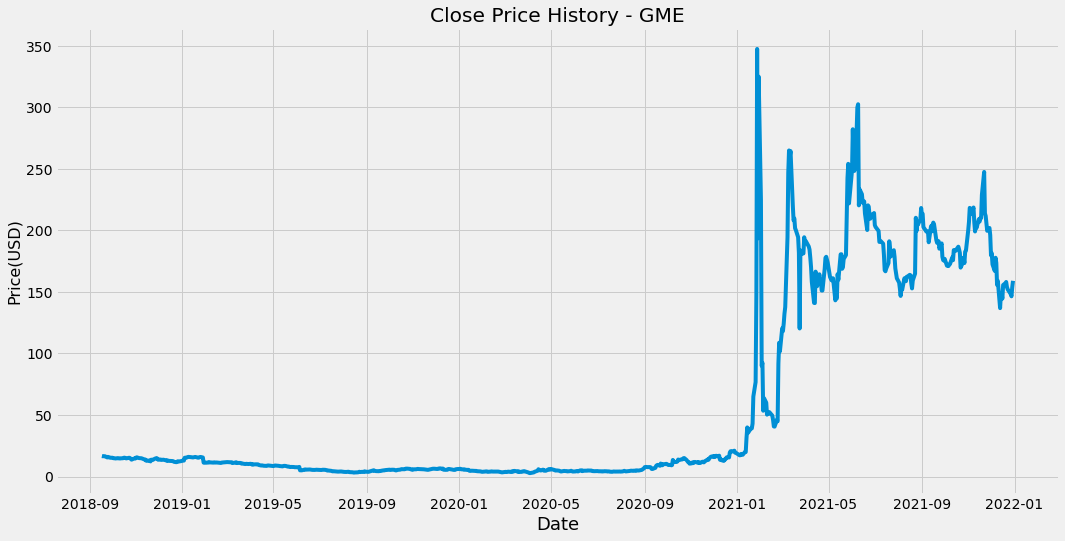

In [72]:
plt.figure(figsize=(16,8))
plt.title('Close Price History - GME')
plt.plot(df4['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price(USD)',fontsize=16)

In [73]:
df4=df4.reset_index()

In [88]:
#GME Daily Change
percent_change=0.00000000000000
yest_close=df4.at[len(df4)-1,'Close']
two_day_close=df4.at[len(df4)-2,'Close']
percent_change=((yest_close-two_day_close)/two_day_close)
if (yest_close < two_day_close):
    print('Percent loss of '+str(percent_change*100)+'% day over day')
else:
    print('Percent gain of '+str(percent_change*100)+'% day over day')
print('Close Cost of $'+str(yest_close))

Percent gain of 3.332687018063917% day over day
Close Cost of $159.05999755859375


In [78]:
df4

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-09-17,16.860001,16.500000,16.709999,16.610001,2232000.0,15.618690
1,2018-09-18,16.680000,16.350000,16.420000,16.500000,1786800.0,15.515255
2,2018-09-19,16.799999,16.450001,16.500000,16.600000,1798200.0,15.609288
3,2018-09-20,16.809999,16.450001,16.600000,16.490000,1604100.0,15.505853
4,2018-09-21,16.750000,16.430000,16.450001,16.520000,3040900.0,15.534062
...,...,...,...,...,...,...,...
824,2021-12-23,155.000000,146.020004,154.000000,152.139999,1053100.0,152.139999
825,2021-12-27,152.619995,140.000000,152.000000,148.309998,1613600.0,148.309998
826,2021-12-28,157.410004,146.410004,147.500000,146.460007,1331100.0,146.460007
827,2021-12-29,155.490005,142.139999,147.850006,153.929993,2035200.0,153.929993


Text(0, 0.5, 'Price(USD)')

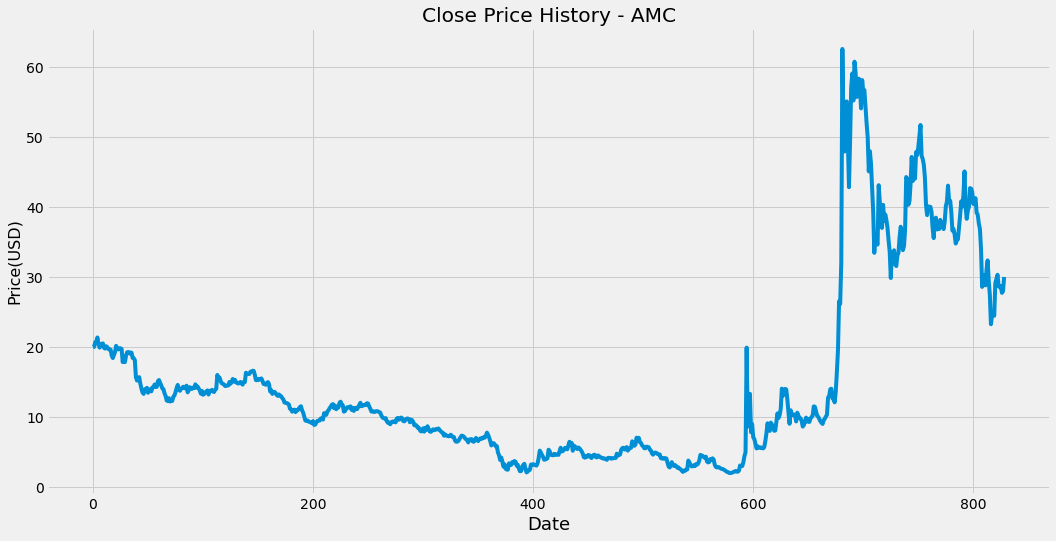

In [92]:
plt.figure(figsize=(16,8))
plt.title('Close Price History - AMC')
plt.plot(df5['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price(USD)',fontsize=16)

In [80]:
df5=df5.reset_index()

In [87]:
#AMC Daily Change
percent_change=0.00000000000000
yest_close=df5.at[len(df5)-1,'Close']
two_day_close=df5.at[len(df5)-2,'Close']
percent_change=((yest_close-two_day_close)/two_day_close)
if (yest_close < two_day_close):
    print('Percent loss of '+str(percent_change*100)+'% day over day')
else:
    print('Percent gain of '+str(percent_change*100)+'% day over day')
print('Close Cost of $'+str(yest_close))

Percent gain of 7.280857931533351% day over day
Close Cost of $29.985000610351562


Text(0, 0.5, 'Price(USD)')

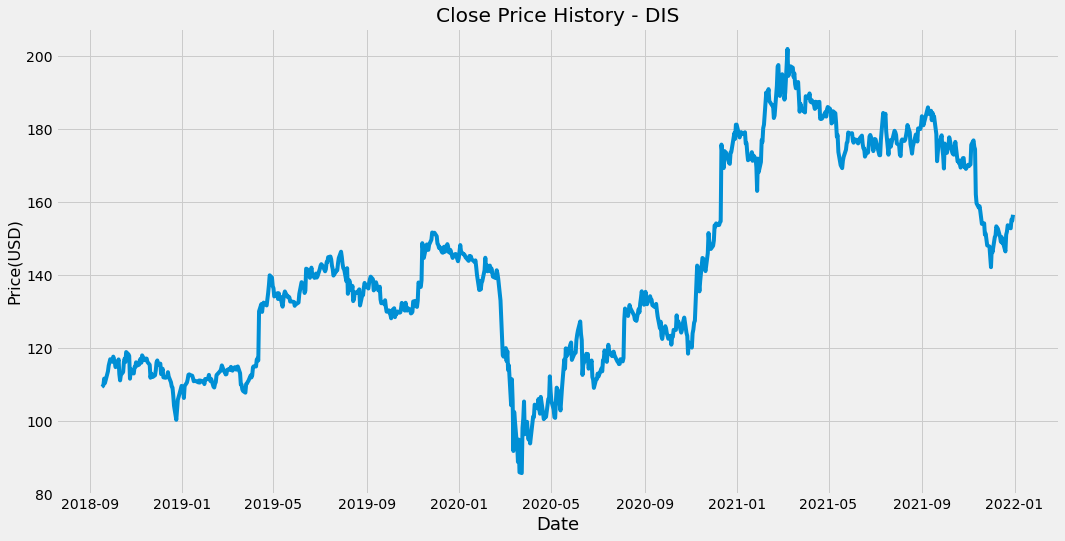

In [93]:
plt.figure(figsize=(16,8))
plt.title('Close Price History - DIS')
plt.plot(df6['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price(USD)',fontsize=16)

In [99]:
df6=df6.reset_index()

In [100]:
#DIS Daily Change
percent_change=0.00000000000000
yest_close=df6.at[len(df6)-1,'Close']
two_day_close=df6.at[len(df6)-2,'Close']
percent_change=((yest_close-two_day_close)/two_day_close)
if (yest_close < two_day_close):
    print('Percent loss of '+str(percent_change*100)+'% day over day')
else:
    print('Percent gain of '+str(percent_change*100)+'% day over day')
print('Close Cost of $'+str(yest_close))

Percent gain of 1.0524988275353808% day over day
Close Cost of $156.5


Text(0, 0.5, 'Price(USD)')

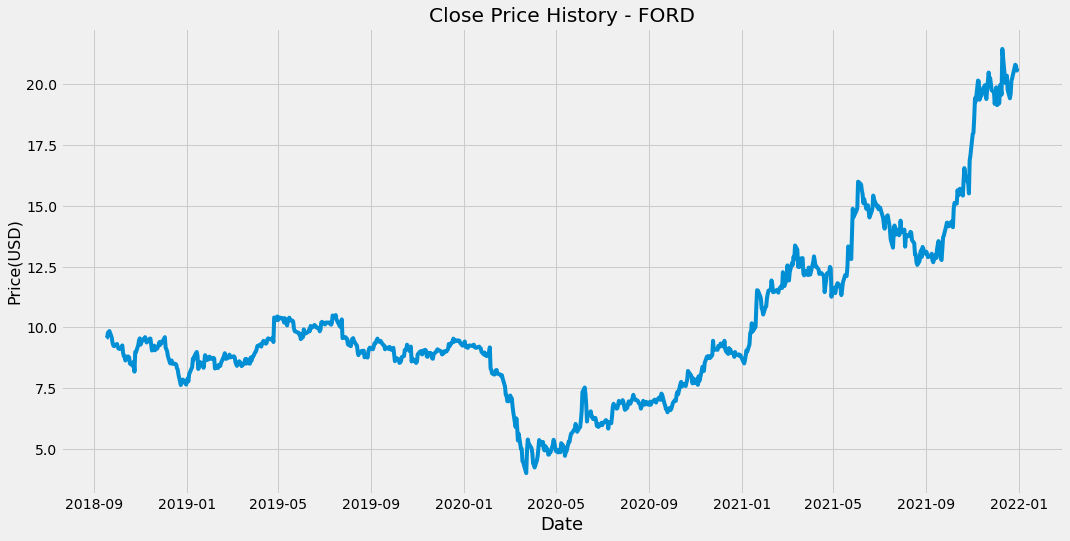

In [101]:
#Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History - FORD')
plt.plot(df7['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price(USD)',fontsize=16)

In [103]:
df7=df7.reset_index()

In [104]:
#Ford Daily Change
percent_change=0.00000000000000
yest_close=df7.at[len(df7)-1,'Close']
two_day_close=df7.at[len(df7)-2,'Close']
percent_change=((yest_close-two_day_close)/two_day_close)
if (yest_close < two_day_close):
    print('Percent loss of '+str(percent_change*100)+'% day over day')
else:
    print('Percent gain of '+str(percent_change*100)+'% day over day')
print('Close Cost of $'+str(yest_close))

Percent gain of 0.4173160171553768% day over day
Close Cost of $20.64579963684082


Text(0, 0.5, 'Price(USD)')

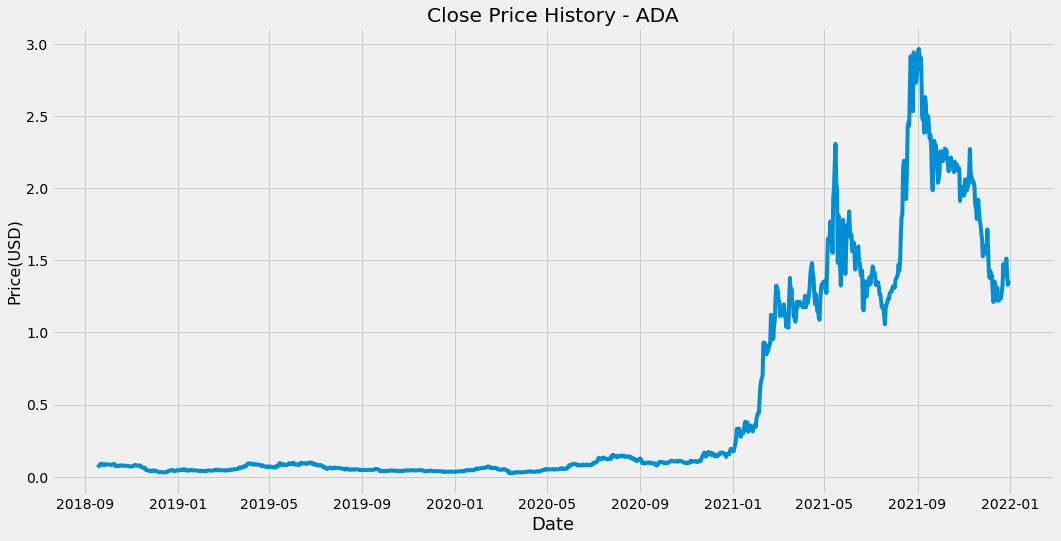

In [105]:
#Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History - ADA')
plt.plot(df8['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price(USD)',fontsize=16)

In [107]:
df8=df8.reset_index()

In [108]:
#ADA Daily Change
percent_change=0.00000000000000
yest_close=df8.at[len(df8)-1,'Close']
two_day_close=df8.at[len(df8)-2,'Close']
percent_change=((yest_close-two_day_close)/two_day_close)
if (yest_close < two_day_close):
    print('Percent loss of '+str(percent_change*100)+'% day over day')
else:
    print('Percent gain of '+str(percent_change*100)+'% day over day')
print('Close Cost of $'+str(yest_close))

Percent gain of 2.2027151090093344% day over day
Close Cost of $1.3601280450820923


Text(0, 0.5, 'Price(USD)')

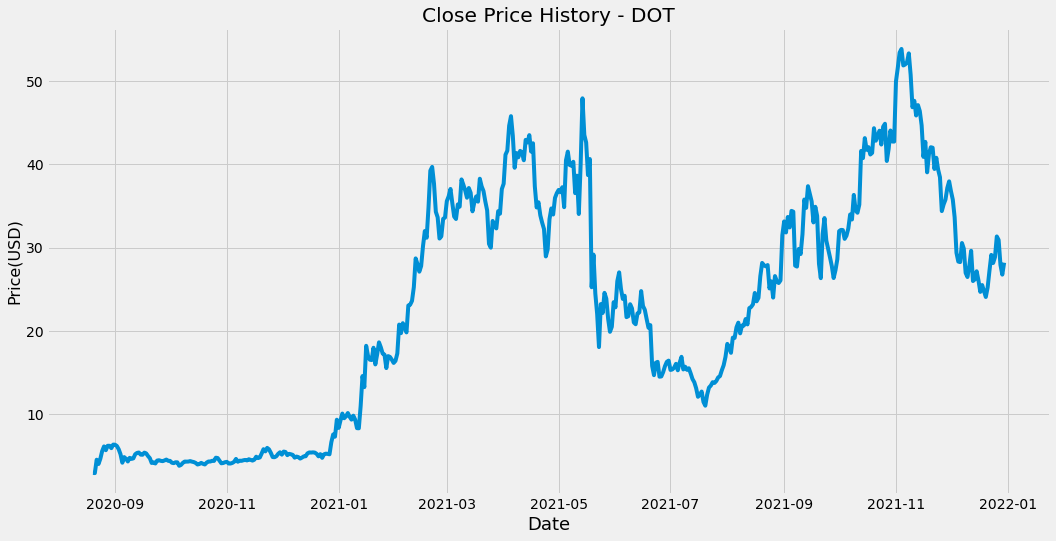

In [109]:
plt.figure(figsize=(16,8))
plt.title('Close Price History - DOT')
plt.plot(df9['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price(USD)',fontsize=16)

In [110]:
df9=df9.reset_index()

In [111]:
#DOT Daily Change
percent_change=0.00000000000000
yest_close=df9.at[len(df9)-1,'Close']
two_day_close=df9.at[len(df9)-2,'Close']
percent_change=((yest_close-two_day_close)/two_day_close)
if (yest_close < two_day_close):
    print('Percent loss of '+str(percent_change*100)+'% day over day')
else:
    print('Percent gain of '+str(percent_change*100)+'% day over day')
print('Close Cost of $'+str(yest_close))

Percent gain of 5.357995868419885% day over day
Close Cost of $28.177335739135742


Text(0, 0.5, 'Price(USD)')

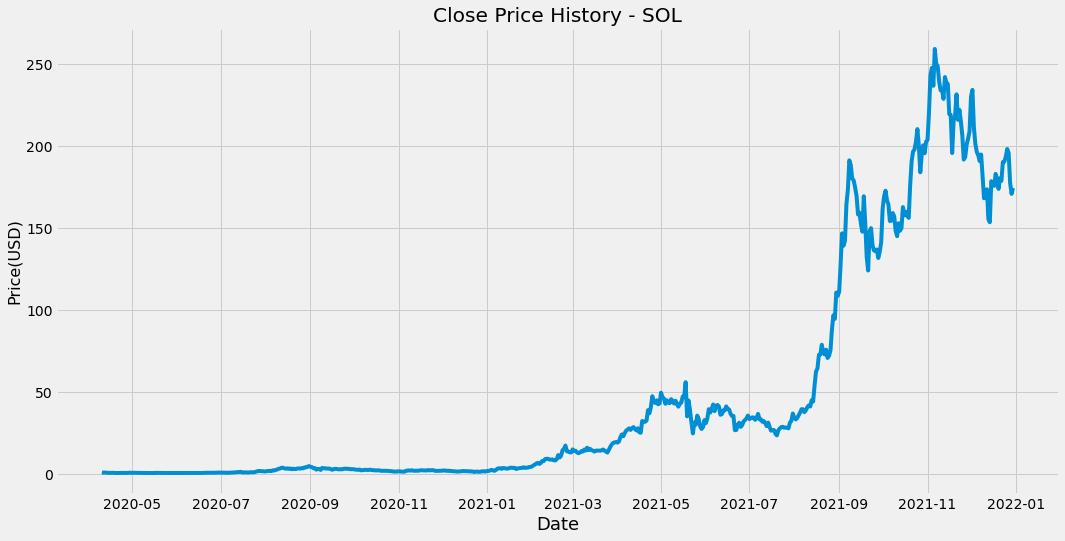

In [112]:
plt.figure(figsize=(16,8))
plt.title('Close Price History - SOL')
plt.plot(df10['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price(USD)',fontsize=16)

In [113]:
df10=df10.reset_index()

In [114]:
#SOL Daily Change
percent_change=0.00000000000000
yest_close=df10.at[len(df10)-1,'Close']
two_day_close=df10.at[len(df10)-2,'Close']
percent_change=((yest_close-two_day_close)/two_day_close)
if (yest_close < two_day_close):
    print('Percent loss of '+str(percent_change*100)+'% day over day')
else:
    print('Percent gain of '+str(percent_change*100)+'% day over day')
print('Close Cost of $'+str(yest_close))

Percent gain of 2.086932528293897% day over day
Close Cost of $174.2190704345703


Text(0, 0.5, 'Price(USD)')

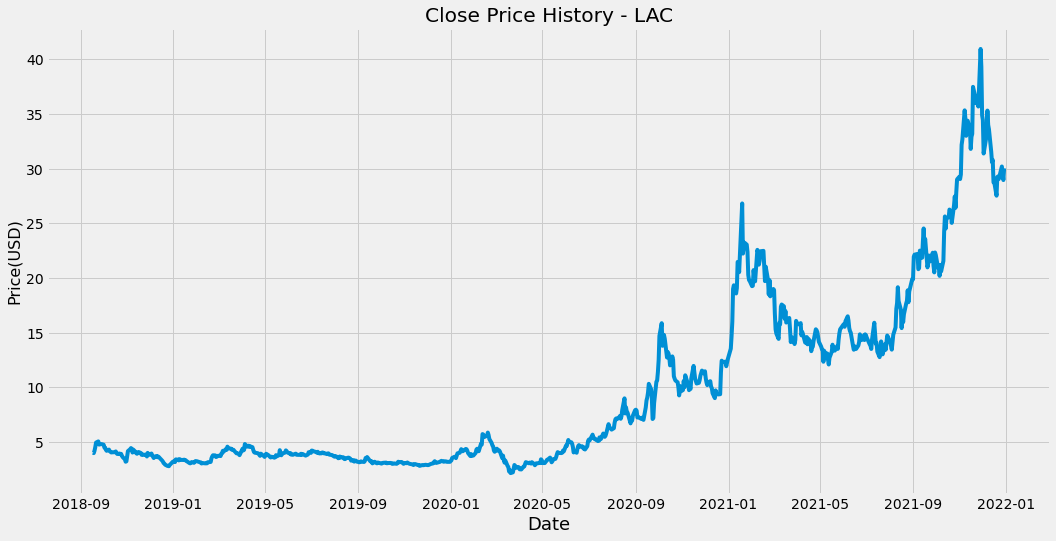

In [115]:
plt.figure(figsize=(16,8))
plt.title('Close Price History - LAC')
plt.plot(df11['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price(USD)',fontsize=16)

In [116]:
df11=df11.reset_index()

In [117]:
#LAC Daily Change
percent_change=0.00000000000000
yest_close=df11.at[len(df11)-1,'Close']
two_day_close=df11.at[len(df11)-2,'Close']
percent_change=((yest_close-two_day_close)/two_day_close)
if (yest_close < two_day_close):
    print('Percent loss of '+str(percent_change*100)+'% day over day')
else:
    print('Percent gain of '+str(percent_change*100)+'% day over day')
print('Close Cost of $'+str(yest_close))

Percent gain of 3.686465069042598% day over day
Close Cost of $30.027599334716797
